# Art Class Hands-On Exercises

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import scipy
import seaborn as sns
from scipy import stats

## Exercise 1: Changing the functional fit
It seems that our Mauna Loa dataset is slightly exponential. Change the plain linear regression to an exponential regression

In [2]:
data = pd.read_csv("data/co2_mm_mlo.csv", header=51)

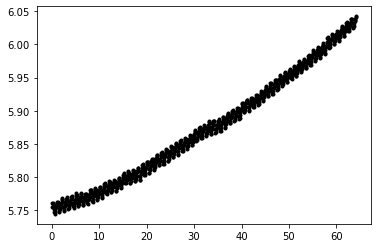

In [29]:
plt.plot(data["decimal date"] - data["decimal date"].min(), np.log(data["average"]), "k.")


In [34]:
data["decimal date"]

0      1.278698e+137
1      7.358398e+137
2      7.813416e+137
3      5.964602e+137
4      1.500566e+137
           ...      
766    4.145810e+181
767    1.233077e+182
768    7.706762e+181
769    3.188380e+182
770    6.817638e+182
Name: average, Length: 771, dtype: float64

In [61]:
with pm.Model() as model:
    b = pm.Normal("b", mu=300, sigma=10)
    m = pm.Normal("m", mu=-50, sigma=25)
    
    sigma = pm.HalfNormal("sigma", sigma=100)
    
    x_ = pm.MutableData("x", data["decimal date"] - data["decimal date"].min())
    mu = pm.Deterministic("mu", pm.math.exp(m*x_)+b)
    
    pm.Normal("y", mu=mu, sigma=sigma, observed=data["average"])
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, m, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.
There were 62 divergences after tuning. Increase `target_accept` or reparameterize.
There were 81 divergences after tuning. Increase `target_accept` or reparameterize.
There were 53 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8831, but should be close to 0.8. Try to increase the number of tuning steps.
There were 82 divergences after tuning. Increase `target_accept` or reparameterize.


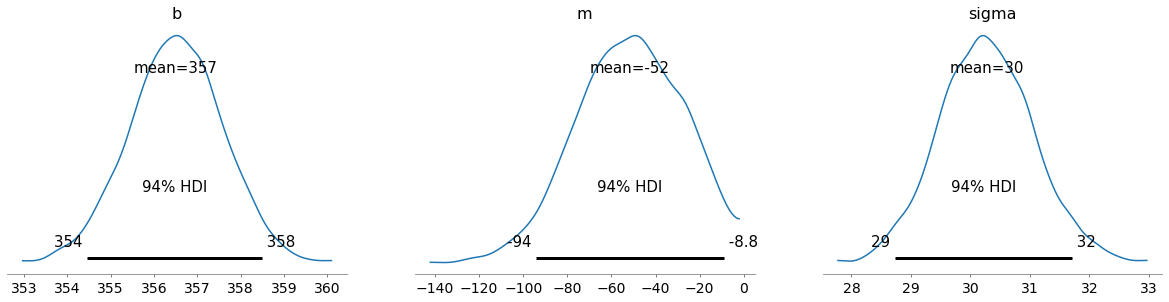

In [62]:
az.plot_posterior(idata.posterior, var_names=["b", "m", "sigma"]);

In [49]:
xl = np.linspace(0, 70, 200)

with model:
    pm.set_data({'x': xl})
    ppc = pm.sample_posterior_predictive(idata, var_names=["mu", "y"])
    idata.extend(ppc)

In [57]:
idata.posterior_predictive["y"].mean(axis=(0,1))

<xarray.DataArray 'y' (y_dim_0: 200)>
array([356.91840993, 355.92788516, 356.5210405 , 356.53011672,
       356.4849447 , 356.92912246, 356.76568403, 355.74341037,
       356.62511105, 356.3398581 , 356.50383815, 357.51832388,
       356.38179546, 356.5551634 , 356.44370909, 356.88995369,
       356.43598929, 355.91151074, 356.54362082, 356.53073062,
       356.58146384, 356.38028193, 356.37830561, 356.83198362,
       356.13031514, 355.96206386, 356.89568711, 356.08896278,
       356.52642404, 357.26502411, 356.43990312, 356.58527124,
       357.40944607, 356.73954473, 356.13660786, 355.9280221 ,
       357.37690147, 356.99775693, 356.64230399, 356.07485638,
       356.09901633, 356.90556054, 356.26175697, 357.08543454,
       356.8527105 , 356.93771117, 356.50737925, 356.47613964,
       356.98756613, 355.49877199, 357.36403977, 356.89923453,
       356.89626334, 357.14760944, 356.43180076, 356.57980263,
       356.96021907, 356.39274087, 355.70553272, 356.20151546,
       356.75858896, 356.68835144, 356.49081342, 356.62022552,
       356.2309434 , 356.95676114, 356.53433737, 355.64149946,
       356.38341998, 355.70399189, 356.71686879, 356.76932524,
       357.77098576, 356.36022885, 356.35347372, 356.37254965,
       356.65242233, 356.16293673, 356.94309232, 357.26123541,
...
       355.8525169 , 356.74571797, 357.64789503, 356.7705996 ,
       355.87063052, 356.71146287, 356.73096221, 357.173354  ,
       357.16931015, 357.1430416 , 357.2277147 , 356.31457911,
       356.60619421, 356.39263778, 355.82213949, 356.64553845,
       355.83360254, 357.10745166, 356.31177798, 356.88852144,
       356.53934289, 357.17319584, 356.67349902, 357.30693231,
       356.22749229, 356.6017515 , 357.85603616, 356.73678379,
       356.32139625, 356.31500699, 356.31957241, 356.56069036,
       356.71343228, 357.34270616, 356.14938377, 356.89165312,
       356.46617856, 356.3484536 , 356.81847034, 355.7020023 ,
       356.17109653, 356.08986664, 357.17893241, 357.02219936,
       356.44526588, 356.65320813, 356.06477422, 356.32076706,
       356.76423868, 356.54556391, 356.92135522, 356.76369547,
       356.08254591, 356.58651186, 355.90697776, 357.02566062,
       356.60901285, 357.30921517, 357.01275898, 356.2741384 ,
       355.84884668, 356.3702394 , 357.06263064, 356.21303477,
       355.99485914, 356.20699693, 355.94536979, 356.77023447,
       356.62444908, 357.15320292, 357.00849901, 356.2822262 ,
       356.23450947, 356.65898164, 356.78160232, 356.50552586,
       356.68027117, 356.16523092, 356.97565197, 356.82995303])
Coordinates:
  * y_dim_0  (y_dim_0) int64 0 1 2 3 4 5 6 7 ... 192 193 194 195 196 197 198 199

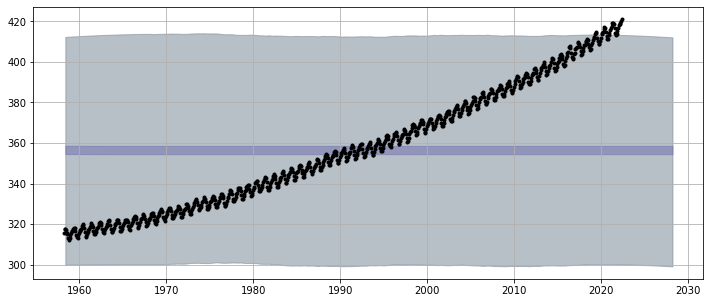

In [50]:
plt.figure(figsize=(12,5))

az.plot_hdi(x=xl + data["decimal date"].min(), hdi_data=az.hdi(idata.posterior_predictive.mu), color="slateblue")
az.plot_hdi(x=xl + data["decimal date"].min(), hdi_data=az.hdi(idata.posterior_predictive.y), color="slategray")

plt.plot(data["decimal date"], data["average"], "k.");

plt.grid(True);

## Exercise 2: Estimate conversion for Website A
We've launched a new website and your boss wants you to estimate the conversion rate. Your boss tells you that there wasn't a lot of money for testing the new website, so you only have 20 data points for the new website, **Website A**.

### Part 1: Estimating `p(Conversion)`

Give your boss an estimate of conversion rate in two ways:

1. Calculate the point value of percentage conversion from pandas or plain python
  * This is what most people would do using Excel
2. Use the model from the A/B testing lesson and give her an estimate with uncertainty
  * Hint: The posterior plot will be quite helpful

In [2]:
websites = pd.read_csv("websites.csv")
websites.head(20)

,Website A,Website B
0,1,0
1,1,1
2,0,0
3,0,1
4,0,0
5,1,1
6,0,0
7,1,1
8,1,0
9,1,1


In [3]:
website_a = websites["Website A"]

In [4]:
website_a.mean()

0.5

In [5]:
with pm.Model() as model_signups:
    # Parameter = prior solution space
    conversion_rate = pm.Beta("conversion_rate", alpha=2, beta=10)

    # Plausibility evaluator: likelihood function
    n_signups = pm.Binomial(
        "n_signups", p=conversion_rate, n=len(website_a), observed=website_a.sum()
    )
    plausible_values_a = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [conversion_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


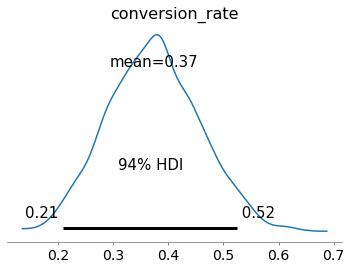

In [6]:
az.plot_posterior(plausible_values_a);

### Part 2: The A/B test

Your boss tells you there also wasn't any money for logging the control website, Website B, so you also only have 20 samples. Run the same analysis as before, but for Website B, and compare your results. Specifically:

1. Calculate the point value of percentage conversion from pandas or plain python and draw a conclusion on which website is better.
2. As a professional statistician you have to provide advice, not just code. Based on the point estimates would you feel comfortable telling your boss Website B is better (or worse)?
3. Use your Bayesian model to also estimate the conversion rate with uncertainty. Use a forest plot to compare the results from the two models. If your boss asked which website has higher conversion, what would you advise now? How did you confidence-level in your recommendation change?

In [7]:
website_b = websites["Website B"]

In [8]:
website_b.mean()

0.45

In [9]:
with pm.Model() as model_signups:
    # Parameter = prior solution space
    conversion_rate = pm.Beta("conversion_rate", alpha=2, beta=10)

    # Plausibility evaluator: likelihood function
    n_signups = pm.Binomial(
        "n_signups", p=conversion_rate, n=len(website_b), observed=website_b.sum()
    )
    plausible_values_b = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [conversion_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


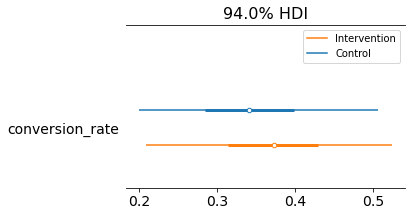

In [10]:
az.plot_forest(
    [plausible_values_b, plausible_values_a],
    model_names=["Control", "Intervention"],
    combined=True,
    figsize=(5, 3),
);

### Part 3: Rerun your analysis with more data
You convince your boss that it's worth getting more samples. You warn her that if she doesn't invest in proper analysis she could lose out on millions of dollars in sales. She reluctantly agrees. 

Now you have 5000 samples for each website. Rerun your analysis from above, and now provide a recommendation as to which website has a better conversion rate.

In [11]:
websites = pd.read_csv("websites_5000_samples.csv")
websites.shape

(5000, 2)

In [12]:
website_a = websites["Website A"]

In [13]:
with pm.Model() as model_signups:
    # Parameter = prior solution space
    conversion_rate = pm.Beta("conversion_rate", alpha=2, beta=10)

    # Plausibility evaluator: likelihood function
    n_signups = pm.Binomial(
        "n_signups", p=conversion_rate, n=len(website_a), observed=website_a.sum()
    )
    plausible_values_a_5000 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [conversion_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


In [14]:
website_b = websites["Website B"]

In [15]:
with pm.Model() as model_signups:
    # Parameter = prior solution space
    conversion_rate = pm.Beta("conversion_rate", alpha=2, beta=10)

    # Plausibility evaluator: likelihood function
    n_signups = pm.Binomial(
        "n_signups", p=conversion_rate, n=len(website_b), observed=website_b.sum()
    )
    plausible_values_b_5000 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [conversion_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


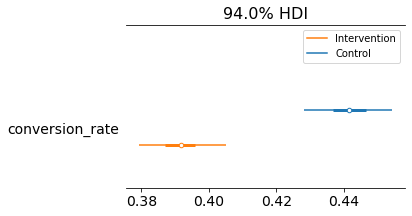

In [16]:
az.plot_forest(
    [plausible_values_b_5000, plausible_values_a_5000],
    model_names=["Control", "Intervention"],
    combined=True,
    figsize=(5, 3),
);

## Part 4: See the effect of more data
You also want to check your own assumptions. Compare your estimation for conversion for Website A with 20 samples versus 5000 samples.

1. Before writing any code, pause and ponder for a minute: would you be more certain or less certain with more data?
2. Use a forest plot to compare your estimation from 20 samples with 5000. Do the results match your intuition?

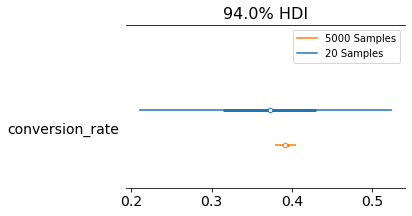

In [17]:
az.plot_forest(
    [plausible_values_a, plausible_values_a_5000],
    model_names=["20 Samples", "5000 Samples"],
    combined=True,
    figsize=(5, 3),
);

# Exercise 3: Reading docs
Documentation is an important tool in becoming a proficient computational data scientist or statistician.

Utilizing the [ArviZ documentation](https://arviz-devs.github.io/arviz/) determine how to
1. Generate a rankplot from the output of `pm.sample()`
2. Convert the Forest Plot into a Ridge Plot
3. **Optional:** Access the posterior group of the returned `InferenceData`, and get the mean of the samples across all dimensions

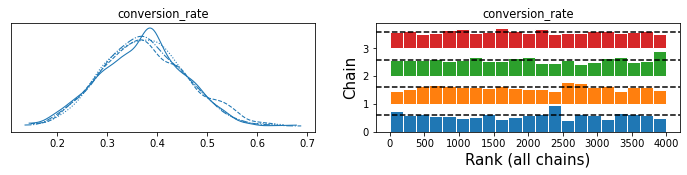

In [18]:
az.plot_trace(plausible_values_a, kind="rank_bars");

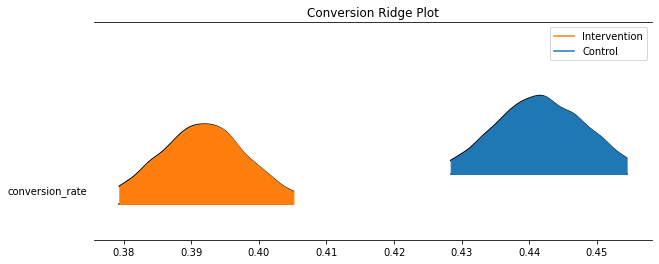

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))
az.plot_forest(
    [plausible_values_b_5000, plausible_values_a_5000],
    model_names=["Control", "Intervention"],
    combined=True,
    kind="ridgeplot",
    ax=ax,
)
ax.set_title("Conversion Ridge Plot");

In [20]:
plausible_values_a.posterior.mean()

<xarray.Dataset>
Dimensions:          ()
Data variables:
    conversion_rate  float64 0.3735